In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## Load the data

In [18]:
df_imputed = pd.read_csv("../data/hpms_aadt_imputed.csv")
df_subset = pd.read_csv("../data/hpms_aadt_subset.csv")

df_imputed.set_index('FID_Link_Cnty_Intxn', inplace=True)
df_subset.set_index('FID_Link_Cnty_Intxn', inplace=True)

/tmp/ipykernel_76309/4244539808.py:1: DtypeWarning: Columns (6) have mixed types. Specify dtype option on import or set low_memory=False.
  df_imputed = pd.read_csv("../data/hpms_aadt_imputed.csv")
/tmp/ipykernel_76309/4244539808.py:2: DtypeWarning: Columns (6) have mixed types. Specify dtype option on import or set low_memory=False.
  df_subset = pd.read_csv("../data/hpms_aadt_subset.csv")


In [19]:
# filter for DC by statefps
df_imputed_dc = df_imputed[df_imputed['STATEFP'] == 11]
df_subset_dc = df_subset[df_subset['STATEFP'] == 11]


In [37]:
sum(df_imputed_dc['AADT_MDV'].isna())

3671

In [20]:
# confirm they are the same length
(len(df_imputed_dc) == len(df_subset_dc))

True

In [25]:
# double check for duplicates
len(df_subset.index) - df_subset.index.nunique()

0

In [34]:
df_imputed_dc

,STATEFP,STATENAME,COUNTYFP,GEOID,F_SYSTEM,URBAN_CODE,URBAN,THROUGH_LANES,LANE_KMS,LANE_MILES,VKT,VMT,AADT,AADT_MDV,AADT_HDV,Shape_Length,VKT_MDV,VKT_HDV,VKT_LDV,URBAN_DESC
FID_Link_Cnty_Intxn,,,,,,,,,,,,,,,,,,,,
2076947,11,NaN,1,11001,1,0 None\n1 None\n2 N...,1.0,11.0,0.035485,0.022050,496.956122,308.794218,154050.0,NaN,524.36,3.225940,NaN,NaN,NaN,urban
2076948,11,NaN,1,11001,1,0 None\n1 None\n2 N...,1.0,8.0,0.045464,0.028250,1335.619139,829.915257,235022.0,6362.0,9787.00,5.682954,36.154951,55.619068,1243.845120,urban
2076950,11,NaN,1,11001,1,0 None\n1 None\n2 N...,1.0,6.0,1.055325,0.655749,41797.924811,25972.026373,237640.0,11815.0,10311.00,175.887581,2078.111773,1813.576850,37906.236188,urban
2076955,11,NaN,1,11001,1,0 None\n1 None\n2 N...,1.0,4.0,0.327923,0.203762,8556.243623,5316.603301,104369.0,4547.0,845.00,81.980699,372.766240,69.273691,8114.203691,urban
2076959,11,NaN,1,11001,1,0 None\n1 None\n2 N...,1.0,4.0,0.640080,0.397727,16701.115835,10377.592258,104369.0,4547.0,845.00,160.019889,727.610437,135.216807,15838.288592,urban
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2086010,11,NaN,1,11001,5,0 None\n1 None\n2 N...,1.0,2.0,0.306749,0.190605,678.988714,421.904027,4427.0,91.0,31.00,153.374455,13.957075,4.754608,660.277030,urban
2086011,11,NaN,1,11001,5,0 None\n1 None\n2 N...,1.0,2.0,0.092883,0.057715,103.146705,64.092391,2221.0,NaN,14.07,46.441560,NaN,NaN,NaN,urban
2086012,11,NaN,1,11001,5,0 None\n1 None\n2 N...,1.0,2.0,0.207256,0.128783,230.157757,143.013400,2221.0,NaN,14.07,103.627986,NaN,NaN,NaN,urban


In [31]:
PREDICTOR_VARS = ["FID_Link_Cnty_Intxn", "COUNTYFP", "F_SYSTEM", "THROUGH_LANES", "AADT"]
RESPONSE_VARS = ["FID_Link_Cnty_Intxn", "AADT_MDV", "AADT_HDV"]

In [32]:
# identify all the missing AADT_MDV and AADT_HDV rows in df_subset_dc
missing_aadt_mdv = df_subset_dc[df_subset_dc['AADT_MDV'].isna()]
missing_aadt_mdv = missing_aadt_mdv[PREDICTOR_VARS + RESPONSE_VARS]
missing_aadt_hdv = df_subset_dc[df_subset_dc['AADT_HDV'].isna()]
missing_aadt_hdv = missing_aadt_hdv[PREDICTOR_VARS + RESPONSE_VARS]

# now find the imputed values from missing_aadt_mdv and missing_aadt_hdv in df_imputed_dc
imputed_aadt_mdv = df_imputed_dc[df_imputed_dc['AADT_MDV']]
imputed_aadt_mdv = imputed_aadt_mdv[PREDICTOR_VARS + RESPONSE_VARS]
imputed_aadt_hdv = df_imputed_dc[df_imputed_dc['AADT_HDV']]
imputed_aadt_hdv = imputed_aadt_hdv[PREDICTOR_VARS + RESPONSE_VARS]



KeyError: "['FID_Link_Cnty_Intxn'] not in index"

In [12]:
# Find by index all the imputed_aadt_mdv rows that are same as missing_aadt_mdv
missing_aadt_mdv

,FID_Link_Cnty_Intxn,COUNTYFP,F_SYSTEM,THROUGH_LANES,AADT,FID_Link_Cnty_Intxn,AADT_MDV,AADT_HDV
982188,2076947,1,1,11.0,154050.0,2076947,NaN,NaN
982200,2076972,1,1,1.0,22801.0,2076972,NaN,NaN
982217,2077038,1,1,1.0,4171.0,2077038,NaN,NaN
982218,2077052,1,1,1.0,18042.0,2077052,NaN,NaN
982230,2077084,1,1,2.0,35132.0,2077084,NaN,NaN
...,...,...,...,...,...,...,...,...
990450,2086007,1,5,2.0,2221.0,2086007,NaN,NaN
990452,2086009,1,5,2.0,2221.0,2086009,NaN,NaN
990454,2086011,1,5,2.0,2221.0,2086011,NaN,NaN
990455,2086012,1,5,2.0,2221.0,2086012,NaN,NaN


In [34]:
missing_aadt_mdv[["COUNTYFP", "F_SYSTEM", "THROUGH_LANES", "AADT"]]

,COUNTYFP,F_SYSTEM,THROUGH_LANES,AADT
991328,1,1,11.0,154050.0
991329,1,1,11.0,154050.0
991343,1,1,1.0,22801.0
991360,1,1,1.0,4171.0
991361,1,1,1.0,18042.0
...,...,...,...,...
999890,1,5,2.0,2221.0
999891,1,5,2.0,2221.0
999892,1,5,2.0,932.0
999894,1,5,2.0,932.0


In [17]:
imputed_aadt_mdv = imputed_aadt_mdv.drop_duplicates(subset='FID_Link_Cnty_Intxn')
imputed_aadt_mdv = imputed_aadt_mdv[~imputed_aadt_mdv['FID_Link_Cnty_Intxn'].isin(missing_aadt_mdv['FID_Link_Cnty_Intxn'])]

ValueError: cannot compute isin with a duplicate axis.

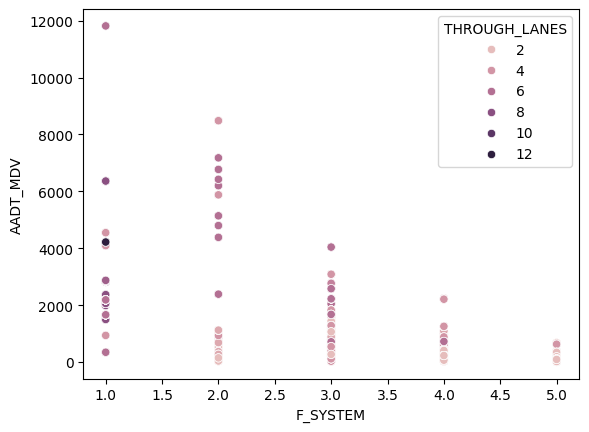

In [16]:
sns.scatterplot(data=df_subset_dc, y='AADT_MDV', x='F_SYSTEM', hue='THROUGH_LANES')
plt.show()
